O=C(/C=C/c1cccc(Cl)c1Cl)c1ccc2c(c1)-c1ccccc1C2
O=C(C=Cc1cccc(Cl)c1Cl)c1ccc2c(c1)-c1ccccc1C2
<class 'array.array'>
(325, 1100, 3)


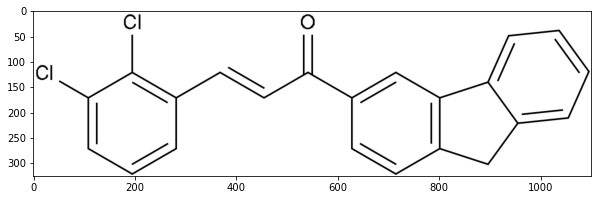

In [1]:
from indigo import Indigo
from indigo.renderer import IndigoRenderer
import matplotlib.pyplot as plt
import numpy as np
import cv2
import rdkit.Chem as Chem

indigo = Indigo()
renderer = IndigoRenderer(indigo)

# s = "C1C=C2C([C@@H]3C4C(C5[C@@H]6C7C(=O)C8C9C%10C(=CC([R1])=CC=%10)C(C=8C(=O)C=7[C@@H](C7C6=CC=CC=7)C=5C(=O)C=4[C@H]2C2C(C=CC(=O)C3=2)=O)C2C9=CC=CC=2)=O)=CC=1"
s = 'O=C(/C=C/C1C=CC=C(Cl)C=1Cl)C1=CC2=C(CC3=CC=CC=C23)C=C1'

print(Chem.CanonSmiles(s))
print(Chem.CanonSmiles(s, useChiral=False))

mol = indigo.loadMolecule(s)
indigo.setOption('render-background-color', '1,1,1')
indigo.setOption('render-output-format', 'png')
indigo.setOption('render-implicit-hydrogens-visible', True)
indigo.setOption('render-superatom-mode', 'collapse')
indigo.setOption('render-atom-ids-visible', False)

# renderer.renderToFile(mol, 'tmp.png')
img = renderer.renderToBuffer(mol)
print(type(img))
img_array = np.frombuffer(img, dtype=np.uint8)
img = cv2.imdecode(img_array, 1)
print(img.shape)
# img = np.repeat(np.expand_dims(img, 2), 3, axis=2)
plt.figure(figsize=(10,5))
plt.imshow(img)
plt.show()

In [2]:
import pandas as pd
from indigo import Indigo
from tqdm import tqdm

zinc_df = pd.read_csv('../data/molbank/zinc/train.csv').sample(n=500000, random_state=42).reset_index(drop=True)
indigo_df = pd.read_csv('../data/molbank/indigo-data/train.csv')

def compute_num_atoms(df):
    indigo = Indigo()
    smiles = df['SMILES'].values
    num_atoms = []
    for s in tqdm(smiles):
        mol = indigo.loadMolecule(s)
        num_atoms.append(mol.countAtoms())
    df['num_atoms'] = num_atoms
    
compute_num_atoms(indigo_df)
compute_num_atoms(zinc_df)

100%|██████████| 500000/500000 [00:34<00:00, 14286.98it/s]


In [3]:
pubchem_df = pd.read_csv('../data/molbank/pubchem/train.csv')
len(pubchem_df)

10000001

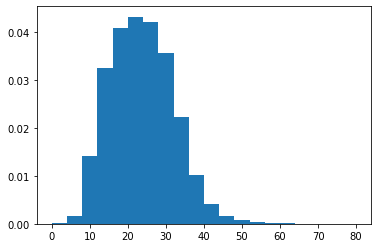

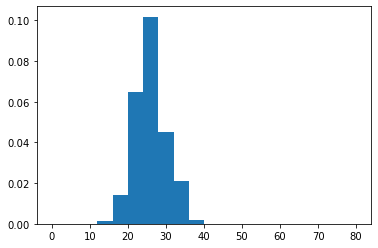

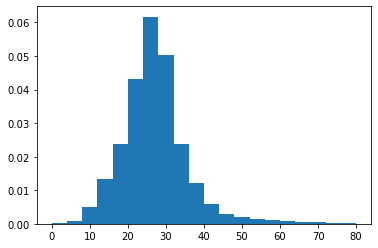

In [19]:
import matplotlib.pyplot as plt

plt.hist(indigo_df['num_atoms'].values, range=(0,80), bins=20, density=True)
plt.show()

plt.hist(zinc_df['num_atoms'].values, range=(0,80), bins=20, density=True)
plt.show()

plt.hist(pubchem_df['num_atoms'].values, range=(0,80), bins=20, density=True)
plt.show()

In [24]:
sum(pubchem_df['num_atoms']>100)

9132

In [6]:
from collections import Counter

def count_atom_types(df):
    indigo = Indigo()
    smiles = df['SMILES'].values
    counter = Counter()
    bond_counter = Counter()
    flag7, flag8 = True, True
    for s in tqdm(smiles):
        try:
            mol = indigo.loadMolecule(s)
            mol.layout()
            for atom in mol.iterateAtoms():
                counter[atom.symbol()] += 1
            for bond in mol.iterateBonds():
                bond_counter[bond.bondStereo()] += 1
                if flag7 and bond.bondStereo() == 7:
                    print(s, 7)
                    flag7 =False
                if flag8 and bond.bondStereo() == 8:
                    print(s, 8)
                    flag8 =False
        except:
            pass
    return counter, bond_counter

# indigo_counter = count_atom_types(indigo_df)
# print(indigo_counter)
# plt.bar(indigo_counter.keys(), indigo_counter.values())
# plt.show()

# zinc_counter = count_atom_types(zinc_df)
# print(zinc_counter) 
# plt.bar(zinc_counter.keys(), zinc_counter.values())
# plt.show()

pubchem_counter, bond_counter = count_atom_types(pubchem_df[:100000])
print(pubchem_counter)
print(bond_counter)

  0%|          | 338/100000 [00:00<00:59, 1683.30it/s]

C1=CC=C(C=C1)/C=C/[C@H]2NC3=CC=CC=C3C(=O)N2CC4=CC=CO4 8
C1CC#C/C(=C\C2=CC=CC=C2)/C(C#CC(C1)OC(=O)C3=CC4=C(C=C3)C(=O)C5=CC=CC=C5C4=O)O 7


100%|██████████| 100000/100000 [01:42<00:00, 977.53it/s]

Counter({'C': 2001365, 'O': 327388, 'N': 245524, 'S': 46035, 'F': 30043, 'Cl': 27547, 'Br': 7494, 'Si': 2050, 'P': 1889, 'I': 1434, 'H': 406, 'B': 282, 'Na': 209, 'Se': 166, 'Sn': 156, 'Fe': 121, 'Ge': 84, 'Cu': 74, 'Li': 64, 'Pt': 63, 'Co': 60, 'Zn': 45, 'As': 42, 'Mn': 39, 'Te': 35, 'Ru': 34, 'K': 34, 'Ni': 33, 'Ag': 29, 'Hg': 28, 'Mg': 27, 'Cr': 27, 'Pd': 27, 'Ti': 25, 'Al': 23, 'Ca': 20, 'W': 18, 'Rh': 15, 'Zr': 15, 'Sb': 14, 'Mo': 13, 'Y': 12, 'Pb': 10, 'Re': 10, 'Nd': 9, 'Tc': 7, 'Cd': 7, 'Rb': 7, 'V': 6, 'Au': 6, 'Ce': 6, 'Os': 6, 'Sm': 5, 'Ir': 4, 'Hf': 4, 'Nb': 4, 'Bi': 4, 'Ba': 4, 'Be': 4, 'In': 4, 'Gd': 3, 'Ga': 3, 'Lu': 3, 'Eu': 2, 'Cs': 2, 'Tl': 2, 'La': 2, 'Th': 2, 'Pu': 2, 'Tm': 2, 'Tb': 2, 'U': 2, 'Sc': 1, 'Yb': 1, 'Sr': 1, 'Am': 1, 'Cf': 1, 'Ta': 1})
Counter({0: 2806778, 5: 34556, 6: 33755, 8: 9845, 7: 5971})


In [23]:
import sys
sys.path.append('../')
from bms.chemistry import get_substitutions, RGROUP_SYMBOLS
from bms.tokenizer import NodeTokenizer

print(pubchem_counter.keys())
substitutions = get_substitutions()
superatoms = []
for abbrvs, smarts, p in substitutions:
    superatoms += abbrvs
print(superatoms)

atoms = list(pubchem_counter.keys()) + superatoms + RGROUP_SYMBOLS

tokenizer = NodeTokenizer(100)
tokenizer.fit_atom_symbols(atoms)
tokenizer.save('../bms/node_vocab.json')

dict_keys(['C', 'N', 'S', 'O', 'Cl', 'B', 'I', 'F', 'Si', 'Br', 'P', 'Sc', 'Mg', 'H', 'W', 'Cr', 'As', 'Na', 'Sn', 'Ru', 'Ge', 'Zn', 'Pt', 'Co', 'Cu', 'Nd', 'Li', 'Ag', 'Se', 'Hg', 'V', 'Fe', 'Pd', 'Al', 'Ir', 'Pb', 'Te', 'Mn', 'Ni', 'Tc', 'Cd', 'Ti', 'K', 'Ca', 'Au', 'Rh', 'Hf', 'Nb', 'Mo', 'Zr', 'Gd', 'Rb', 'Yb', 'Sm', 'Sb', 'Eu', 'Ga', 'Re', 'Cs', 'Tl', 'Lu', 'Ce', 'Bi', 'La', 'Os', 'Th', 'Sr', 'Pu', 'Tm', 'Ba', 'Am', 'Be', 'Y', 'In', 'Tb', 'Cf', 'U', 'Ta'])
['NO2', 'O2N', 'CHO', 'OHC', 'CO2Et', 'COOEt', 'OAc', 'NHAc', 'Ac', 'OBz', 'Bz', 'OBn', 'Bn', 'NHBoc', 'NBoc', 'Boc', 'Cbm', 'Cbz', 'Cy', 'Fmoc', 'Mes', 'OMs', 'Ms', 'Ph', 'Py', 'Suc', 'TBS', 'TBZ', 'OTf', 'Tf', 'TFA', 'TMS', 'Ts', 'OMe', 'MeO', 'SMe', 'MeS', 'NMe', 'MeN', 'Me', 'OEt', 'EtO', 'Et', 'Pr', 'nPr', 'Bu', 'nBu', 'iPr', 'iBu', 'OiBu', 'OtBu', 'tBu', 'CF3', 'F3C', 'NCF3', 'CCl3', 'CO2H', 'COOH', 'CN', 'OCH3', 'SO3H']


O=C1C2=CC=CC=C2N[C@H](/C=C/C2C=CC=CC=2)N1CC1=CC=CO1
0 1 2 0
1 2 1 0
2 3 2 0
3 4 1 0
4 5 2 0
5 0 1 0
3 6 1 0
6 7 2 8
8 7 1 6
8 9 1 0
9 10 1 0
10 11 2 0
11 12 1 0
12 13 2 0
13 14 1 0
14 15 2 0
15 10 1 0
15 16 1 0
16 17 2 0
16 18 1 0
18 8 1 0
18 19 1 0
19 20 1 0
20 21 2 0
21 22 1 0
22 23 2 0
23 24 1 0
24 20 1 0


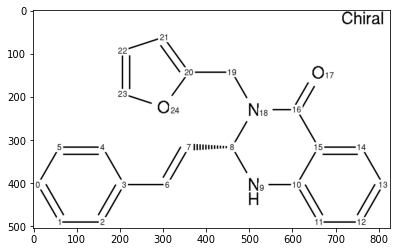

In [12]:
s = 'C1=CC=C(C=C1)/C=C/[C@H]2NC3=CC=CC=C3C(=O)N2CC4=CC=CO4'
indigo = Indigo()
renderer = IndigoRenderer(indigo)
mol = indigo.loadMolecule(s)
mol.layout() # necessary!!!
print(mol.canonicalSmiles())
for bond in mol.iterateBonds():
    print(bond.source().index(), bond.destination().index(), bond.bondOrder(), bond.bondStereo())

indigo.setOption('render-background-color', '1,1,1')
indigo.setOption('render-output-format', 'png')
indigo.setOption('render-atom-ids-visible', True)
img = renderer.renderToBuffer(mol)
# print(img)
img_array = np.asarray(bytearray(img), dtype=np.uint8)
img = cv2.imdecode(img_array, 0)
img = np.repeat(np.expand_dims(img, 2), 3, axis=2)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.show()

{'id': '1', 'Element': '6', 'p': '176.126785 88.980675'}
{'id': '2', 'Element': '7', 'NumHydrogens': '1', 'p': '161.126755 62.999924'}
{'id': '3', 'Element': '6', 'p': '131.126770 62.999954'}
{'id': '4', 'Element': '7', 'NumHydrogens': '0', 'p': '113.493195 38.729454'}
{'id': '5', 'Element': '6', 'p': '84.961517 48.000000'}
{'id': '6', 'Element': '6', 'p': '58.980759 33.000000'}
{'id': '7', 'Element': '6', 'p': '33.000004 48.000000'}
{'id': '8', 'Element': '6', 'p': '33.000000 77.999992'}
{'id': '9', 'Element': '6', 'p': '58.980759 93.000000'}
{'id': '10', 'Element': '6', 'p': '84.961525 78.000000'}
{'id': '11', 'Element': '16', 'NumHydrogens': '0', 'p': '113.493202 87.270531'}
{'id': '12', 'Element': '8', 'NumHydrogens': '0', 'p': '206.126785 88.980659'}


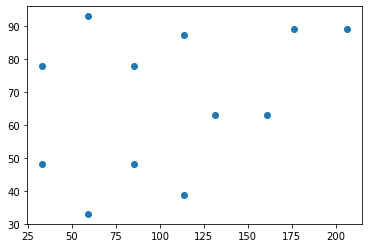

In [40]:
import xml.etree.ElementTree as ET
import numpy as np

tree = ET.parse('tmp.txt')
root = tree.getroot()

nodes = []

for node in root.iter('n'):
    print(node.attrib)
    x, y = node.attrib['p'].split(' ')
    nodes.append([float(x), float(y)])

nodes = np.array(nodes)
plt.scatter(nodes[:,0], nodes[:,1])
plt.show()